In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df=pd.read_csv("/content/twitter.csv")
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
df["labels"] =df["class"].map({0: "Hate Speech",
                                    1: "Offensive Language",
                                    2: "No Hate and Offensive"})
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No Hate and Offensive
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


In [5]:
df.labels.value_counts()

Offensive Language       19190
No Hate and Offensive     4163
Hate Speech               1430
Name: labels, dtype: int64

In [6]:
data=df[["tweet","labels"]]
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",No Hate and Offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [7]:
#Data Preprocessing

def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    text=[word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"]=data["tweet"].apply(clean)

<ipython-input-7-ad508d146405>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]=data["tweet"].apply(clean)


In [8]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No Hate and Offensive
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
...,...,...
24778,you muthafin lie coreyemanuel right tl trash...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,No Hate and Offensive
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [ ]:
#Segregating data on the basis of class
hatespeech=data[data['labels']=="Hate Speech"]
hatespeech

,tweet,labels
85,whalelookyher queer gaywad,Hate Speech
89,whitethunduh alsarabsss he beaner smh tell he...,Hate Speech
110,devilgrimz vigxrart your fuck gay blacklist ho...,Hate Speech
184,markroundtreejr lmfaoooo hate black peopl the...,Hate Speech
202,nochillpaz least im nigger lmfao,Hate Speech
...,...,...
24576,guy biggest faggot omfg,Hate Speech
24685,one name offens kike wop kraut wetback jigaboo...,Hate Speech
24751,pussi ass nigga know nigga,Hate Speech
24776,your nigger,Hate Speech


In [ ]:
offensive=data[data['labels']=="Offensive Language"]
offensive

,tweet,labels
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
5,tmadisonx shit blow meclaim faith somebodi sti...,Offensive Language
...,...,...
24774,realli care bout di bitch dick yo feel,Offensive Language
24775,worri bout bitch need,Offensive Language
24778,you muthafin lie coreyemanuel right tl trash...,Offensive Language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language


In [ ]:
neutral=data[data['labels']=="No Hate and Offensive"]
neutral

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No Hate and Offensive
40,momma said pussi cat insid doghous,No Hate and Offensive
63,simplyaddictedtoguy woof woof hot scalli lad,No Hate and Offensive
66,allaboutmanfeet woof woof hot sole,No Hate and Offensive
67,allyhaaaaa lemmi eat oreo amp dish one oreo lol,No Hate and Offensive
...,...,...
24736,yaya ho cute avi tho rt vivalaari idea sleep,No Hate and Offensive
24737,yea ntel new friend friend kno theyr allow one...,No Hate and Offensive
24767,know say earli bird get worm put gummi worm mo...,No Hate and Offensive
24779,youv gone broke wrong heart babi drove redneck...,No Hate and Offensive


In [ ]:
sentences = hatespeech['tweet'].tolist()
len(sentences)

1430

In [ ]:
sentences_as_one_string = " ".join(sentences)

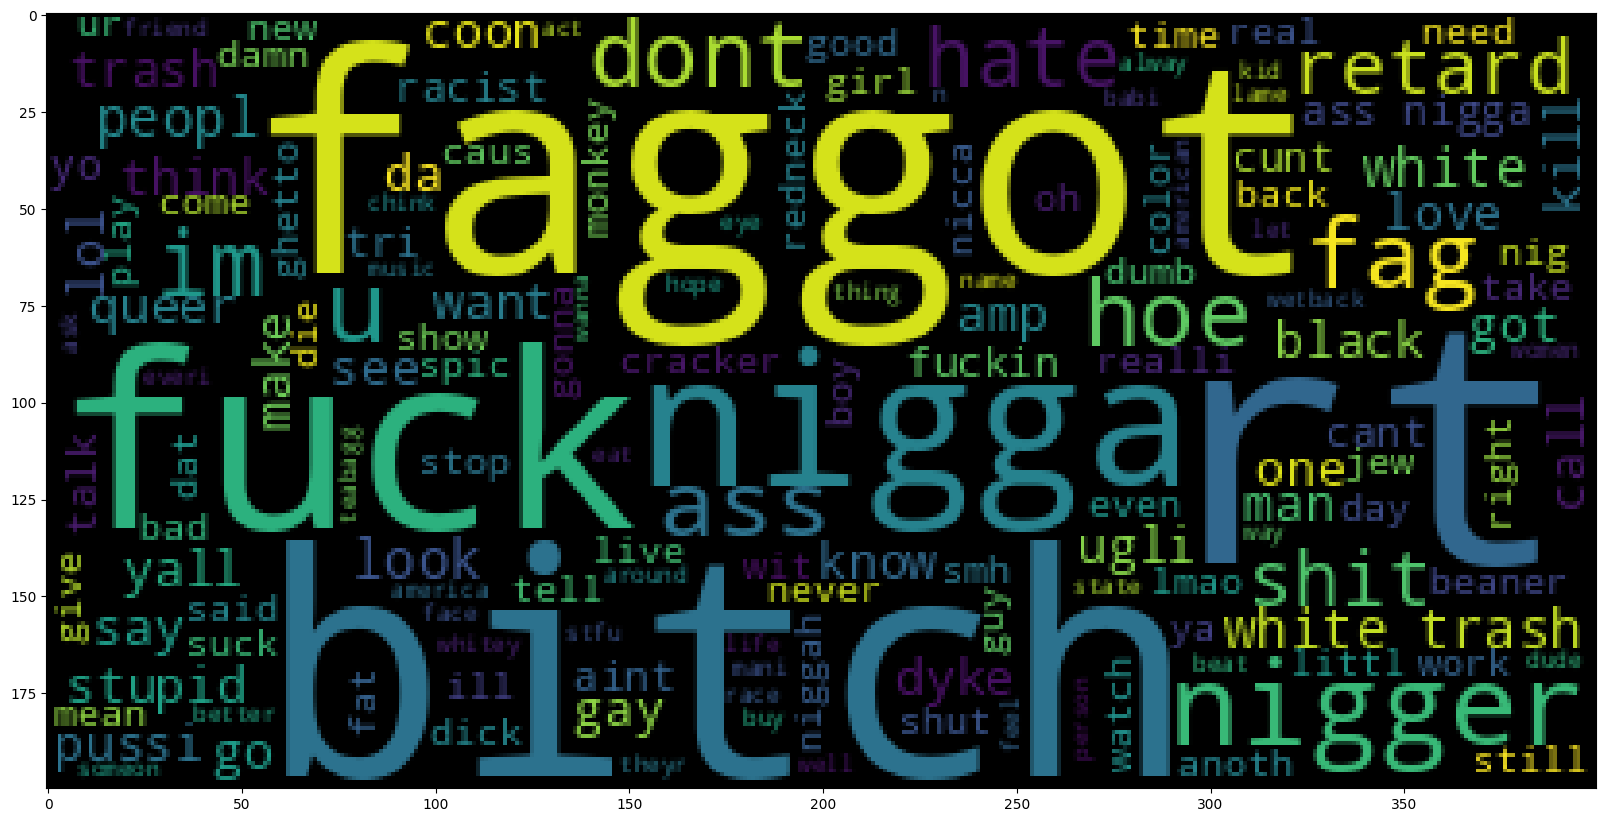

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [ ]:
sentences = offensive['tweet'].tolist()
len(sentences)

19190

In [ ]:
sentences_as_one_string = " ".join(sentences)

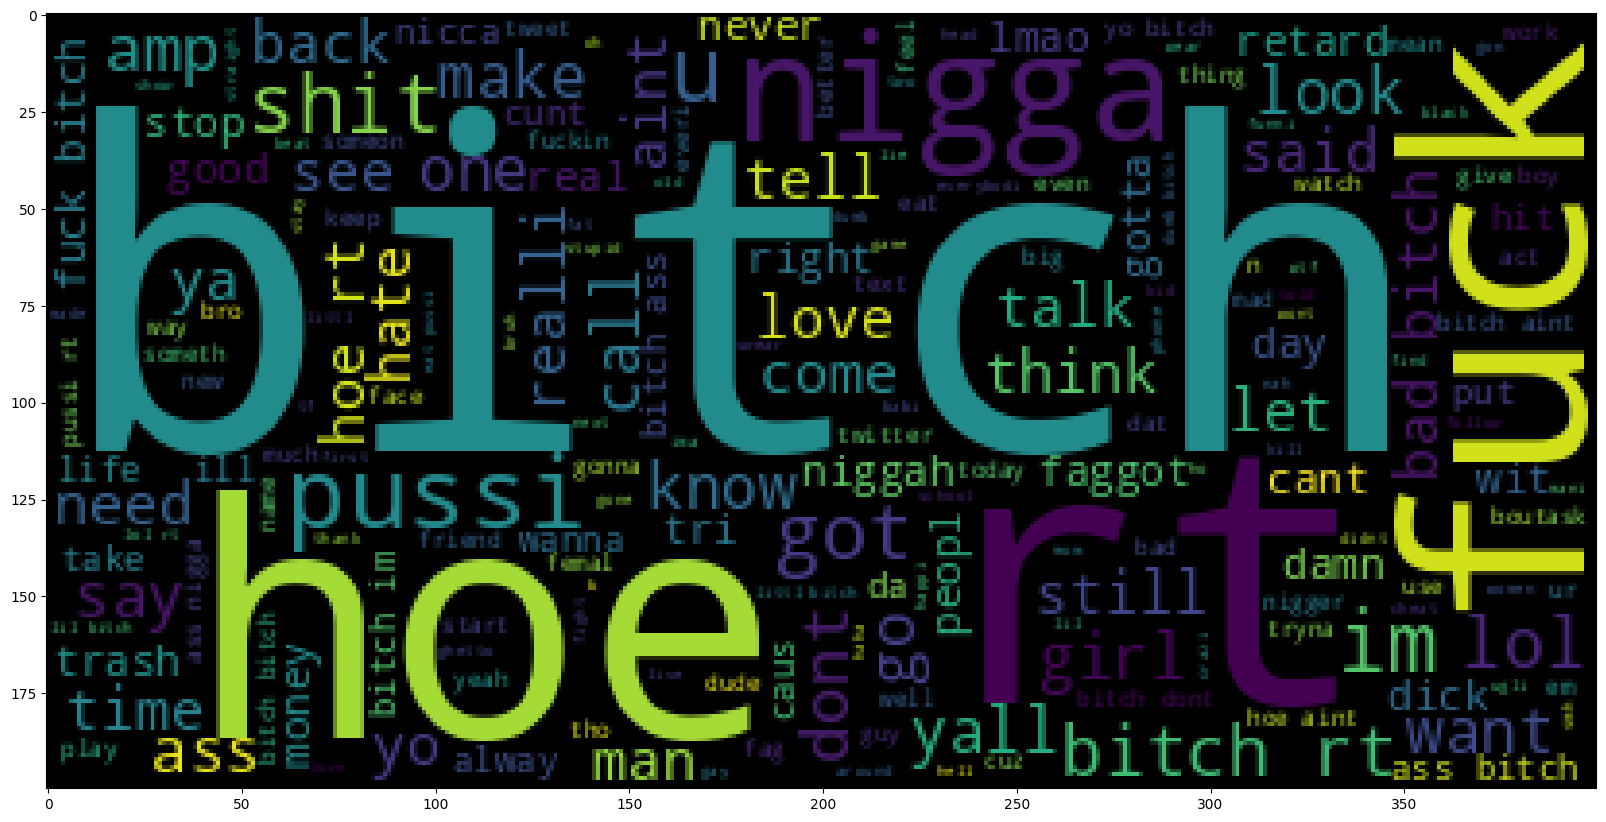

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [ ]:
sentences = neutral['tweet'].tolist()
len(sentences)

4163

In [ ]:
sentences_as_one_string = " ".join(sentences)

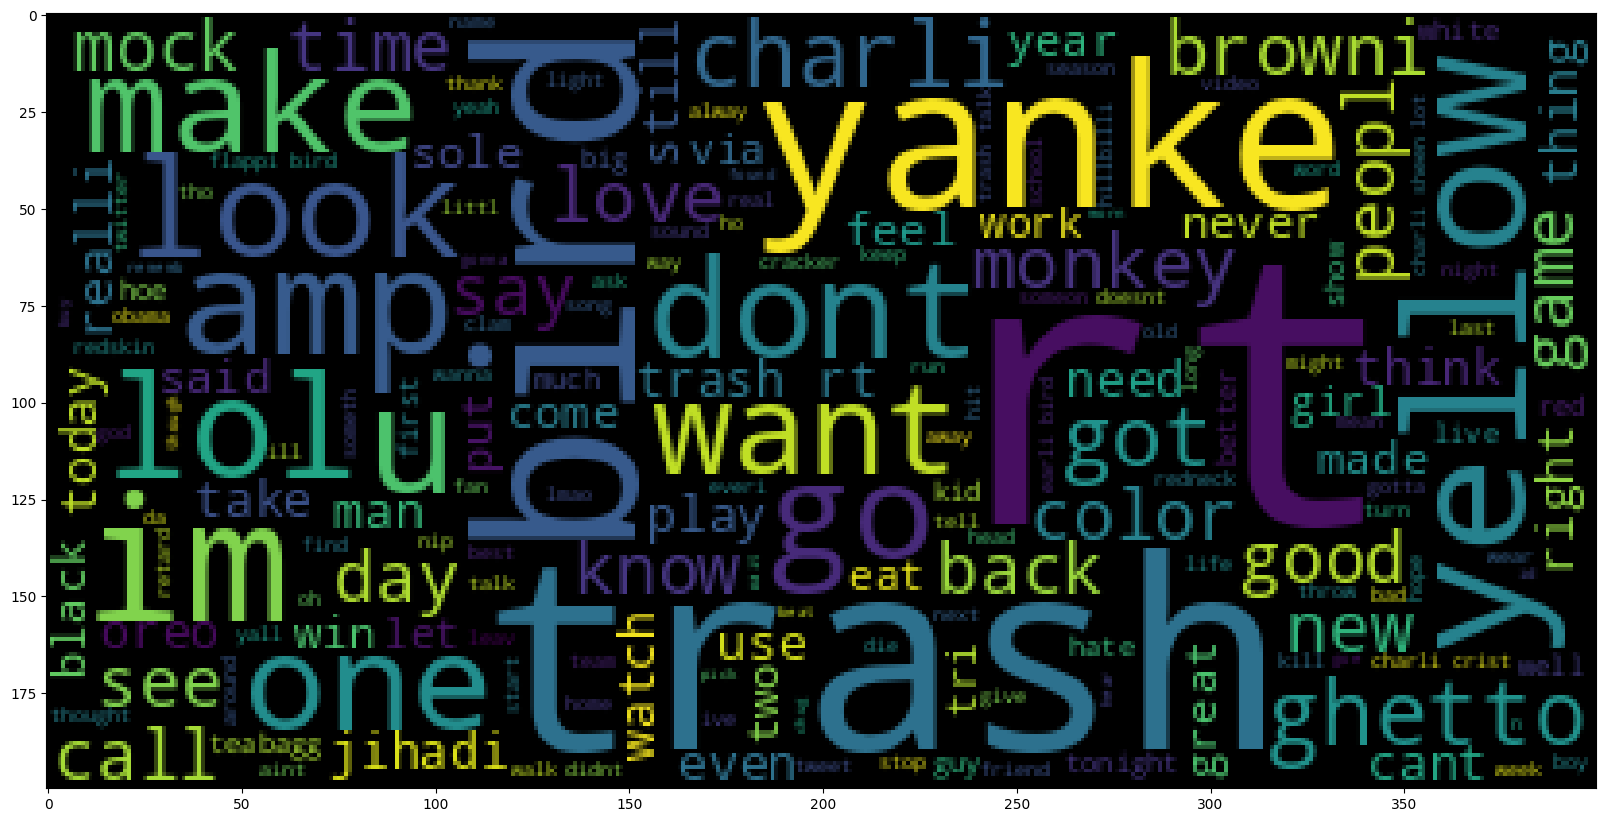

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [9]:
x=data["tweet"]
y=data["labels"]

cv=CountVectorizer(max_features=300)
x=cv.fit_transform(x).toarray()

y = pd.get_dummies(y)
y = np.array(y)

In [ ]:
x.shape

(24783, 300)

In [ ]:
y.shape

(24783, 3)

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D,Bidirectional,Flatten
from keras.models import Sequential

In [ ]:
max_words = 50000
max_len = 300

In [ ]:

# Sequential Model
model=Sequential()

# embeddidng layer
model.add(Embedding(max_words,input_length=max_len,output_dim=32))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100,dropout=0.2,recurrent_dropout=0.2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(3,activation= 'softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 32)           1600000   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 300, 32)           0         
 alDropout1D)                                                    
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               106400    
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                6432      
                                                                 
 dropout (Dropout)           (None, 32)               

In [ ]:
history = model.fit(x_train, y_train, batch_size = 256, validation_split = 0.1, epochs = 10)

Epoch 1/10
70/70 [==============================] - 272s 4s/step - loss: 0.7305 - acc: 0.7698 - val_loss: 0.6485 - val_acc: 0.7796
Epoch 2/10
70/70 [==============================] - 261s 4s/step - loss: 0.6767 - acc: 0.7741 - val_loss: 0.6476 - val_acc: 0.7796
Epoch 3/10
70/70 [==============================] - 304s 4s/step - loss: 0.6730 - acc: 0.7741 - val_loss: 0.6486 - val_acc: 0.7796
Epoch 4/10
70/70 [==============================] - 276s 4s/step - loss: 0.6701 - acc: 0.7741 - val_loss: 0.6476 - val_acc: 0.7796
Epoch 5/10
70/70 [==============================] - 279s 4s/step - loss: 0.6545 - acc: 0.7741 - val_loss: 0.6185 - val_acc: 0.7796
Epoch 6/10
70/70 [==============================] - 275s 4s/step - loss: 0.6302 - acc: 0.7741 - val_loss: 0.5940 - val_acc: 0.7796
Epoch 7/10
70/70 [==============================] - 268s 4s/step - loss: 0.6139 - acc: 0.7741 - val_loss: 0.5764 - val_acc: 0.7796
Epoch 8/10
70/70 [==============================] - 286s 4s/step - loss: 0.6101 - a

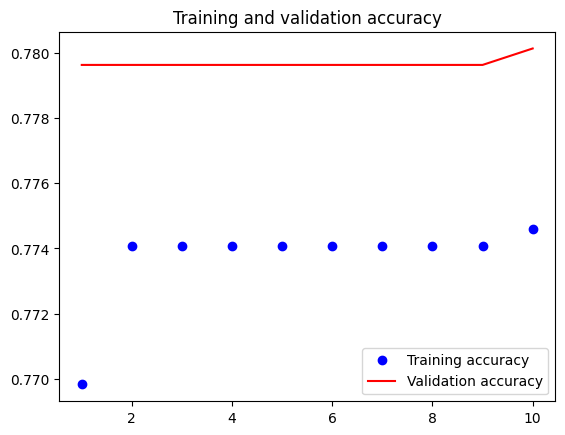

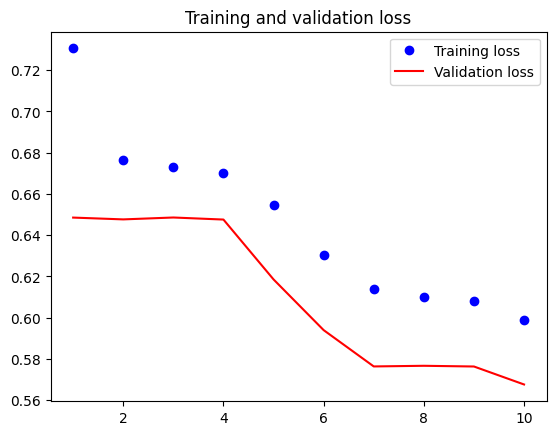

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:

from keras.layers import Embedding, SpatialDropout1D, GRU, Flatten, Dense, Dropout


# Sequential Model
model1 = Sequential()

# Embedding layer
model1.add(Embedding(max_words, input_length=max_len, output_dim=32))
model1.add(SpatialDropout1D(0.2))

# GRU layer
model1.add(Bidirectional(GRU(100, dropout=0.2, recurrent_dropout=0.2)))

# Dense layers
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
# Output layer
model1.add(Dense(3, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# Print model summary
model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 32)           1600000   
                                                                 
 spatial_dropout1d_2 (Spati  (None, 300, 32)           0         
 alDropout1D)                                                    
                                                                 
 bidirectional_2 (Bidirecti  (None, 200)               80400     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 32)                6432      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)               

In [ ]:
history1 = model1.fit(x_train, y_train, batch_size = 256, validation_split = 0.1, epochs = 10)

Epoch 1/10
70/70 [==============================] - 244s 3s/step - loss: 0.8012 - acc: 0.7472 - val_loss: 0.6519 - val_acc: 0.7796
Epoch 2/10
70/70 [==============================] - 212s 3s/step - loss: 0.7176 - acc: 0.7693 - val_loss: 0.6556 - val_acc: 0.7796
Epoch 3/10
70/70 [==============================] - 212s 3s/step - loss: 0.7013 - acc: 0.7729 - val_loss: 0.6544 - val_acc: 0.7796
Epoch 4/10
70/70 [==============================] - 213s 3s/step - loss: 0.6953 - acc: 0.7739 - val_loss: 0.6453 - val_acc: 0.7796
Epoch 5/10
70/70 [==============================] - 216s 3s/step - loss: 0.6886 - acc: 0.7741 - val_loss: 0.6429 - val_acc: 0.7796
Epoch 6/10
70/70 [==============================] - 215s 3s/step - loss: 0.6847 - acc: 0.7741 - val_loss: 0.6435 - val_acc: 0.7796
Epoch 7/10
70/70 [==============================] - 208s 3s/step - loss: 0.6777 - acc: 0.7741 - val_loss: 0.6426 - val_acc: 0.7796
Epoch 8/10
70/70 [==============================] - 210s 3s/step - loss: 0.6771 - a

In [ ]:
sample = "Let's unite and kill all the people who are protesting against the government"
xsample=cv.transform([sample]).toarray()
print(model.predict(xsample))

1/1 [==============================] - 1s 1s/step
[[0.1238865  0.30949867 0.56661487]]


In [ ]:
test = 'I wanna kill you and rape you and cut you in pieces'
xsample=cv.transform([test]).toarray()
print(model.predict(xsample))

1/1 [==============================] - 0s 327ms/step
[[0.1243511 0.2277237 0.6479252]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
ypred=clf.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.31      0.28      0.29       290
           1       0.76      0.74      0.75       835
           2       0.92      0.90      0.91      3832

   micro avg       0.86      0.84      0.85      4957
   macro avg       0.66      0.64      0.65      4957
weighted avg       0.86      0.84      0.85      4957
 samples avg       0.84      0.84      0.84      4957



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
sample = "Let's unite and kill all the people who are protesting against the government"
data = cv.transform([sample]).toarray()
print(clf.predict(data))

[[1 0 0]]


In [ ]:
test = 'I wanna kill you and rape you and cut you in pieces'
xsample=cv.transform([test]).toarray()
print(clf.predict(xsample))

[[1 0 0]]


In [ ]:
test = 'i am eating fruits'
xsample=cv.transform([test]).toarray()
print(clf.predict(xsample))

[[0 1 0]]


In [15]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
ypredknn=knn.predict(x_test)
print(classification_report(y_test,ypredknn))

              precision    recall  f1-score   support

           0       0.37      0.12      0.18       290
           1       0.74      0.80      0.77       835
           2       0.92      0.92      0.92      3832

   micro avg       0.88      0.85      0.86      4957
   macro avg       0.68      0.61      0.62      4957
weighted avg       0.86      0.85      0.85      4957
 samples avg       0.85      0.85      0.85      4957



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypredknn))

0.8527335081702643


In [17]:
sample = "Let's unite and kill all the people who are protesting against the government"
data = cv.transform([sample]).toarray()
print(knn.predict(data))

[[0 0 1]]


In [19]:
test = 'I wanna kill you and rape you and cut you in pieces'
xsample=cv.transform([test]).toarray()
print(knn.predict(xsample))

[[0 0 0]]


In [20]:
test = 'i am eating fruits'
xsample=cv.transform([test]).toarray()
print(knn.predict(xsample))

[[0 1 0]]


KNN not predicting well
